# Proyek Analisis Data: [Bike-Sharing-Dataset]
- **Nama:** Nadhira Aurell Puspitaningrum
- **Email:** nadhiraurelll@gmail.com
- **ID Dicoding:** nadhira_aurell_I1mX

## Menentukan Pertanyaan Bisnis

- Berapa total jumlah penyewa di hari libur setiap tahun?
- Berapa total jam penyewa di hari libur setiap bulan?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



```
kode diatas merupakan library python yang akan digunakan.
```



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




```
Kode diatas digunakan untuk menghubungkan dan mengakses Google drive dari Google colab.
```



## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv("/content/drive/MyDrive/Dicoding/Belajar Analisis Data dengan Python/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df = pd.read_csv("/content/drive/MyDrive/Dicoding/Belajar Analisis Data dengan Python/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1




```
pd.read_csv digunakan untuk membaca file csv yang ada di Google Drive. _df.head() digunakan untuk menampilkan 5 baris pertama dari DataFrame.
```



### Assessing Data

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB




```
Kode diatas memberikan informasi singkat tentang DataFrame 'day_df'.
```



In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



```
Kode diatas digunakan untuk menghitung jumlah nilai yang hilang (Null) pada setiap kolom dari DataFrame 'day_df'.
```



In [10]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000




```
Kode diatas digunakan untuk menghitung jumlah baris yang memiliki duplikat dalam DataFrame 'day_df'.
```



In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB




```
Kode diatas memberikan informasi singkat tentang DataFrame 'hour_df'.
```



In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



```
Kode diatas digunakan untuk menghitung jumlah nilai yang hilang (Null) pada setiap kolom dari DataFrame 'hour_df'.
```



In [13]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000




```
Kode diatas digunakan untuk menghitung jumlah baris yang memiliki duplikat dalam DataFrame 'hour_df'.
```



### Cleaning Data

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])



```
Kode diatas digunakan untuk mengubah tipe data dalam kolom dteday pada DataFrame 'day_df' menjadi tipe data datetime.
```



In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa



```
Kode diatas bertujuan untuk menampilkan informasi dari sebuah DataFrame 'day_df' setelah diubah tipe datanya.
```



In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])



```
Kode diatas digunakan untuk mengubah tipe data dalam kolom dteday pada DataFrame 'houra_df' menjadi tipe data datetime.
```



In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-



```
Kode diatas bertujuan untuk menampilkan informasi dari sebuah DataFrame 'hour_df' setelah diubah tipe datanya.
```



## Exploratory Data Analysis (EDA)

### Explore Data Day

In [18]:
day_df.describe(include="all")

<ipython-input-18-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000




```
Kode diatas digunakan untuk menampilkan informasi lebih lengkap dari DataFrame 'day_df'.
```



In [19]:
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "weekday": ["max", "min", "mean", "std"]
})

instant weekday                        
        nunique     max min      mean       std
holiday                                        
0           710       6   0  3.032394  2.009236
1            21       5   1  1.809524  1.435933



```
Kode diatas digunakan untuk menggabungkan data dari DataFrame 'day_df' berdasarkan kolom holiday, serta melakukan agregasi data di setiap kelompok yang terbentuk.
```



In [20]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64



```
Kode diatas digunakan untuk menghasilkan nilai unik dari kolom instant pada setiap kelompok musim yang diurutkan berdasarkan jumlah nilai uniknya.
```



In [21]:
#Berapa total jumlah penyewa di hari libur setiap tahun?
holiday_data = day_df[day_df['holiday'] ==1]
total_rentals_year_on_holiday = holiday_data.groupby(holiday_data['dteday'].dt.year)['cnt'].sum()

print(total_rentals_year_on_holiday)

dteday
2011    30022
2012    48413
Name: cnt, dtype: int64




```
Kode diatas digunakan untuk menghitung total jumlah penyewa di hari libur setiap tahun. Pada kode "day_df['holiday'] == 1", berarti hanya mengambil baris pada kolom 'holiday' yang memiliki nilai 1 atau libur.
```



### Explore Data Hour

In [22]:
hour_df.describe(include="all")

<ipython-input-22-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000




```
Kode diatas digunakan untuk menampilkan informasi lebih lengkap dari DataFrame 'hour_df'.
```



In [23]:
hour_df.groupby(by="temp").instant.nunique().sort_values(ascending=False)

temp
0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.26    559
0.46    559
0.52    556
0.42    548
0.50    531
0.24    522
0.74    516
0.44    507
0.22    421
0.76    396
0.38    372
0.20    354
0.68    349
0.80    325
0.58    305
0.28    301
0.48    288
0.16    230
0.82    213
0.78    169
0.18    155
0.84    138
0.14    138
0.86    131
0.90     90
0.12     76
0.88     53
0.10     51
0.92     49
0.94     17
0.02     17
0.08     17
0.04     16
0.06     16
0.96     16
0.98      1
1.00      1
Name: instant, dtype: int64



```
Kode diatas digunakn untuk menampilkan jumlah nilai unik dari kolom instant pada kelompok suhu yang diurutkan berdasarkan nilai uniknya.
```



In [24]:
hour_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "weekday": ["max", "min", "mean", "std"]
})

instant weekday                        
        nunique     max min      mean       std
holiday                                        
0         16879       6   0  3.038924  2.010127
1           500       5   1  1.814000  1.406898



```
Kode diatas digunakan untuk menggabungkan data dari DataFrame 'hour_day' berdasarkan kolom holiday.
```



In [25]:
# Berapa total jam penyewa di hari libur setiap bulan?

hour_df['total_hour'] = hour_df['casual'] + hour_df['registered']

hasil = hour_df.groupby(['mnth', 'holiday'])['total_hour'].sum().reset_index()
print(hasil)

    mnth  holiday  total_hour
0      1        0      129684
1      1        1        5249
2      2        0      147116
3      2        1        4236
4      3        0      228920
5      4        0      259598
6      4        1        9496
7      5        0      321545
8      5        1       10141
9      6        0      346342
10     7        0      331502
11     7        1       13446
12     8        0      351194
13     9        0      336606
14     9        1        9385
15    10        0      311757
16    10        1       10595
17    11        0      241274
18    11        1       13557
19    12        0      208706
20    12        1        2330




```
Kode diatas digunakan untuk menghitung total jam penyewa di hari libur setiap bulannya. Kode pada baris pertama digunakan untuk membuat kolom baru dengan nama 'total_hour' yang berisi jumlah total jam penyewa daro kolom casual. Kemudian dikelompokkan berdasarkan bulan dan status libur.
```



## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa total jumlah penyewa di hari libur setiap tahun?

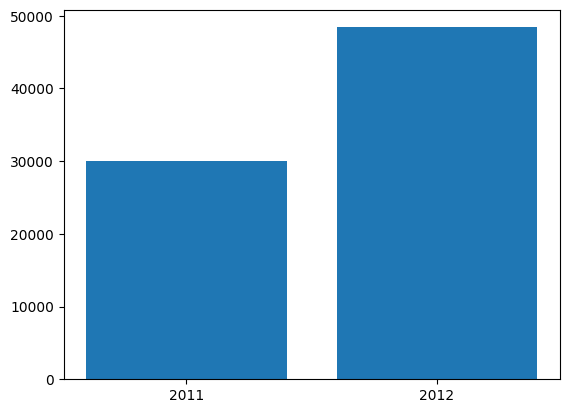

In [26]:
day = ('2011', '2012')
votes = (30022, 48413)

plt.bar(x=day, height=votes)
plt.show()



```
  Dari hasil Bar Chart diatas dapat dilihat bahwa, pada tahun 2012 jumlah penyewa di hari libur lebih banyak dari pada tahun 2011 dengan jumalah 48.413 orang, sedangkan pada tahun 2011 jumlah penyewa hanya mencapai 30.022 orang.
```

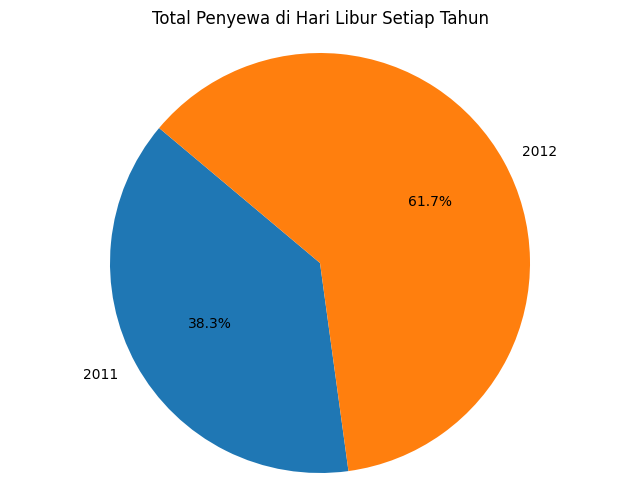

In [27]:
years = total_rentals_year_on_holiday.index
total_rentals = total_rentals_year_on_holiday.values

labels = [str(year) for year in years]

plt.figure(figsize=(8, 6))
plt.pie(total_rentals_year_on_holiday, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Penyewa di Hari Libur Setiap Tahun')
plt.axis('equal')
plt.show()



```
Dengan adanya visualisasi data menggunakan Pie Chart yang saya buat, kita dapat melihat persentase dari setiap pelanggan di hari libur setiap tahunnya. Pada tahun 2012 memiliki persentase 61.7%, sedangkan tahun 2011 memiliki persentase 38.3%.  
```

### Pertanyaan 2: Berapa total jam penyewa di hari libur setiap bulan?

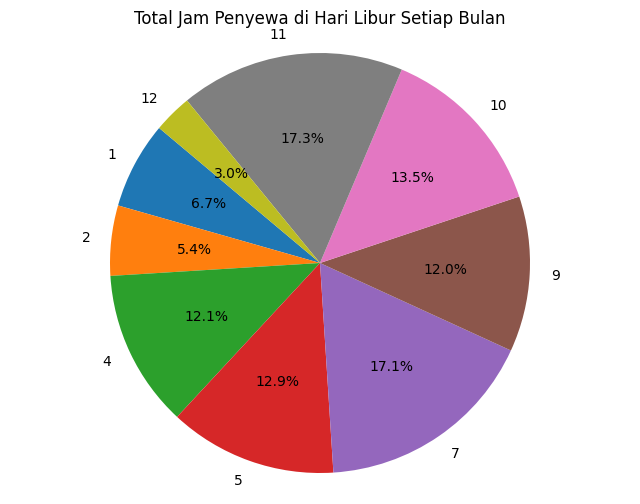

In [30]:
holiday_hour_df = hasil[hasil['holiday'] == 1]

plt.figure(figsize=(8, 6))
plt.pie(holiday_hour_df['total_hour'], labels=holiday_hour_df['mnth'], autopct='%1.1f%%', startangle=140)
plt.title('Total Jam Penyewa di Hari Libur Setiap Bulan')
plt.axis('equal')
plt.show()



```
Deangan adanya visualisasi data diatas kita dapat melihat lebih jelas dengan menggunakan persentase setiap tahunnya. Ternyata pada bulan ke 11 jumlah jamnya lebih banyak dibandingkan dengan bulan 7, meskipun hanya selisih 0.2%.
```



In [31]:
merged_df = pd.concat([hour_df, day_df.drop(columns=['instant'])], axis=0)



```
Kode diatas menggunakn dungsu 'pd.concat()' untuk menggabungkan dua DataFrame yaitu hour_df dan day_df menjadi satu DataFrame tunggal.
```



In [32]:
print(merged_df)

     instant     dteday  season  yr  mnth   hr  holiday  weekday  workingday  \
0        1.0 2011-01-01       1   0     1  0.0        0        6           0   
1        2.0 2011-01-01       1   0     1  1.0        0        6           0   
2        3.0 2011-01-01       1   0     1  2.0        0        6           0   
3        4.0 2011-01-01       1   0     1  3.0        0        6           0   
4        5.0 2011-01-01       1   0     1  4.0        0        6           0   
..       ...        ...     ...  ..   ...  ...      ...      ...         ...   
726      NaN 2012-12-27       1   1    12  NaN        0        4           1   
727      NaN 2012-12-28       1   1    12  NaN        0        5           1   
728      NaN 2012-12-29       1   1    12  NaN        0        6           0   
729      NaN 2012-12-30       1   1    12  NaN        0        0           0   
730      NaN 2012-12-31       1   1    12  NaN        0        1           1   

     weathersit      temp     atemp    



```
Kode diatas untuk menampilkan informasi da
```



In [33]:
merged_df.to_csv('merged_df.csv', index=False)

## Conclusion

- Untuk menjawab pertanyaan 1 mengenai total jumlah penyewa di hari libur setiap tahun dapat dilihat dari hasil yang telah saya cari, bahwa pada tahun 2012 jumlah penyewa dihari libur lebih banyak dari pada jumlah tahun 2011.
- Untuk menjawab pertanyaan 2 mengenai total jam penyewa di hari libur setiap bulan dapat dilihat bahwa pada bulan 11 dan 7 memiliki total jam yang lebih banyak dari pada bulan yang lainnya.